In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


# Plot data over datetime

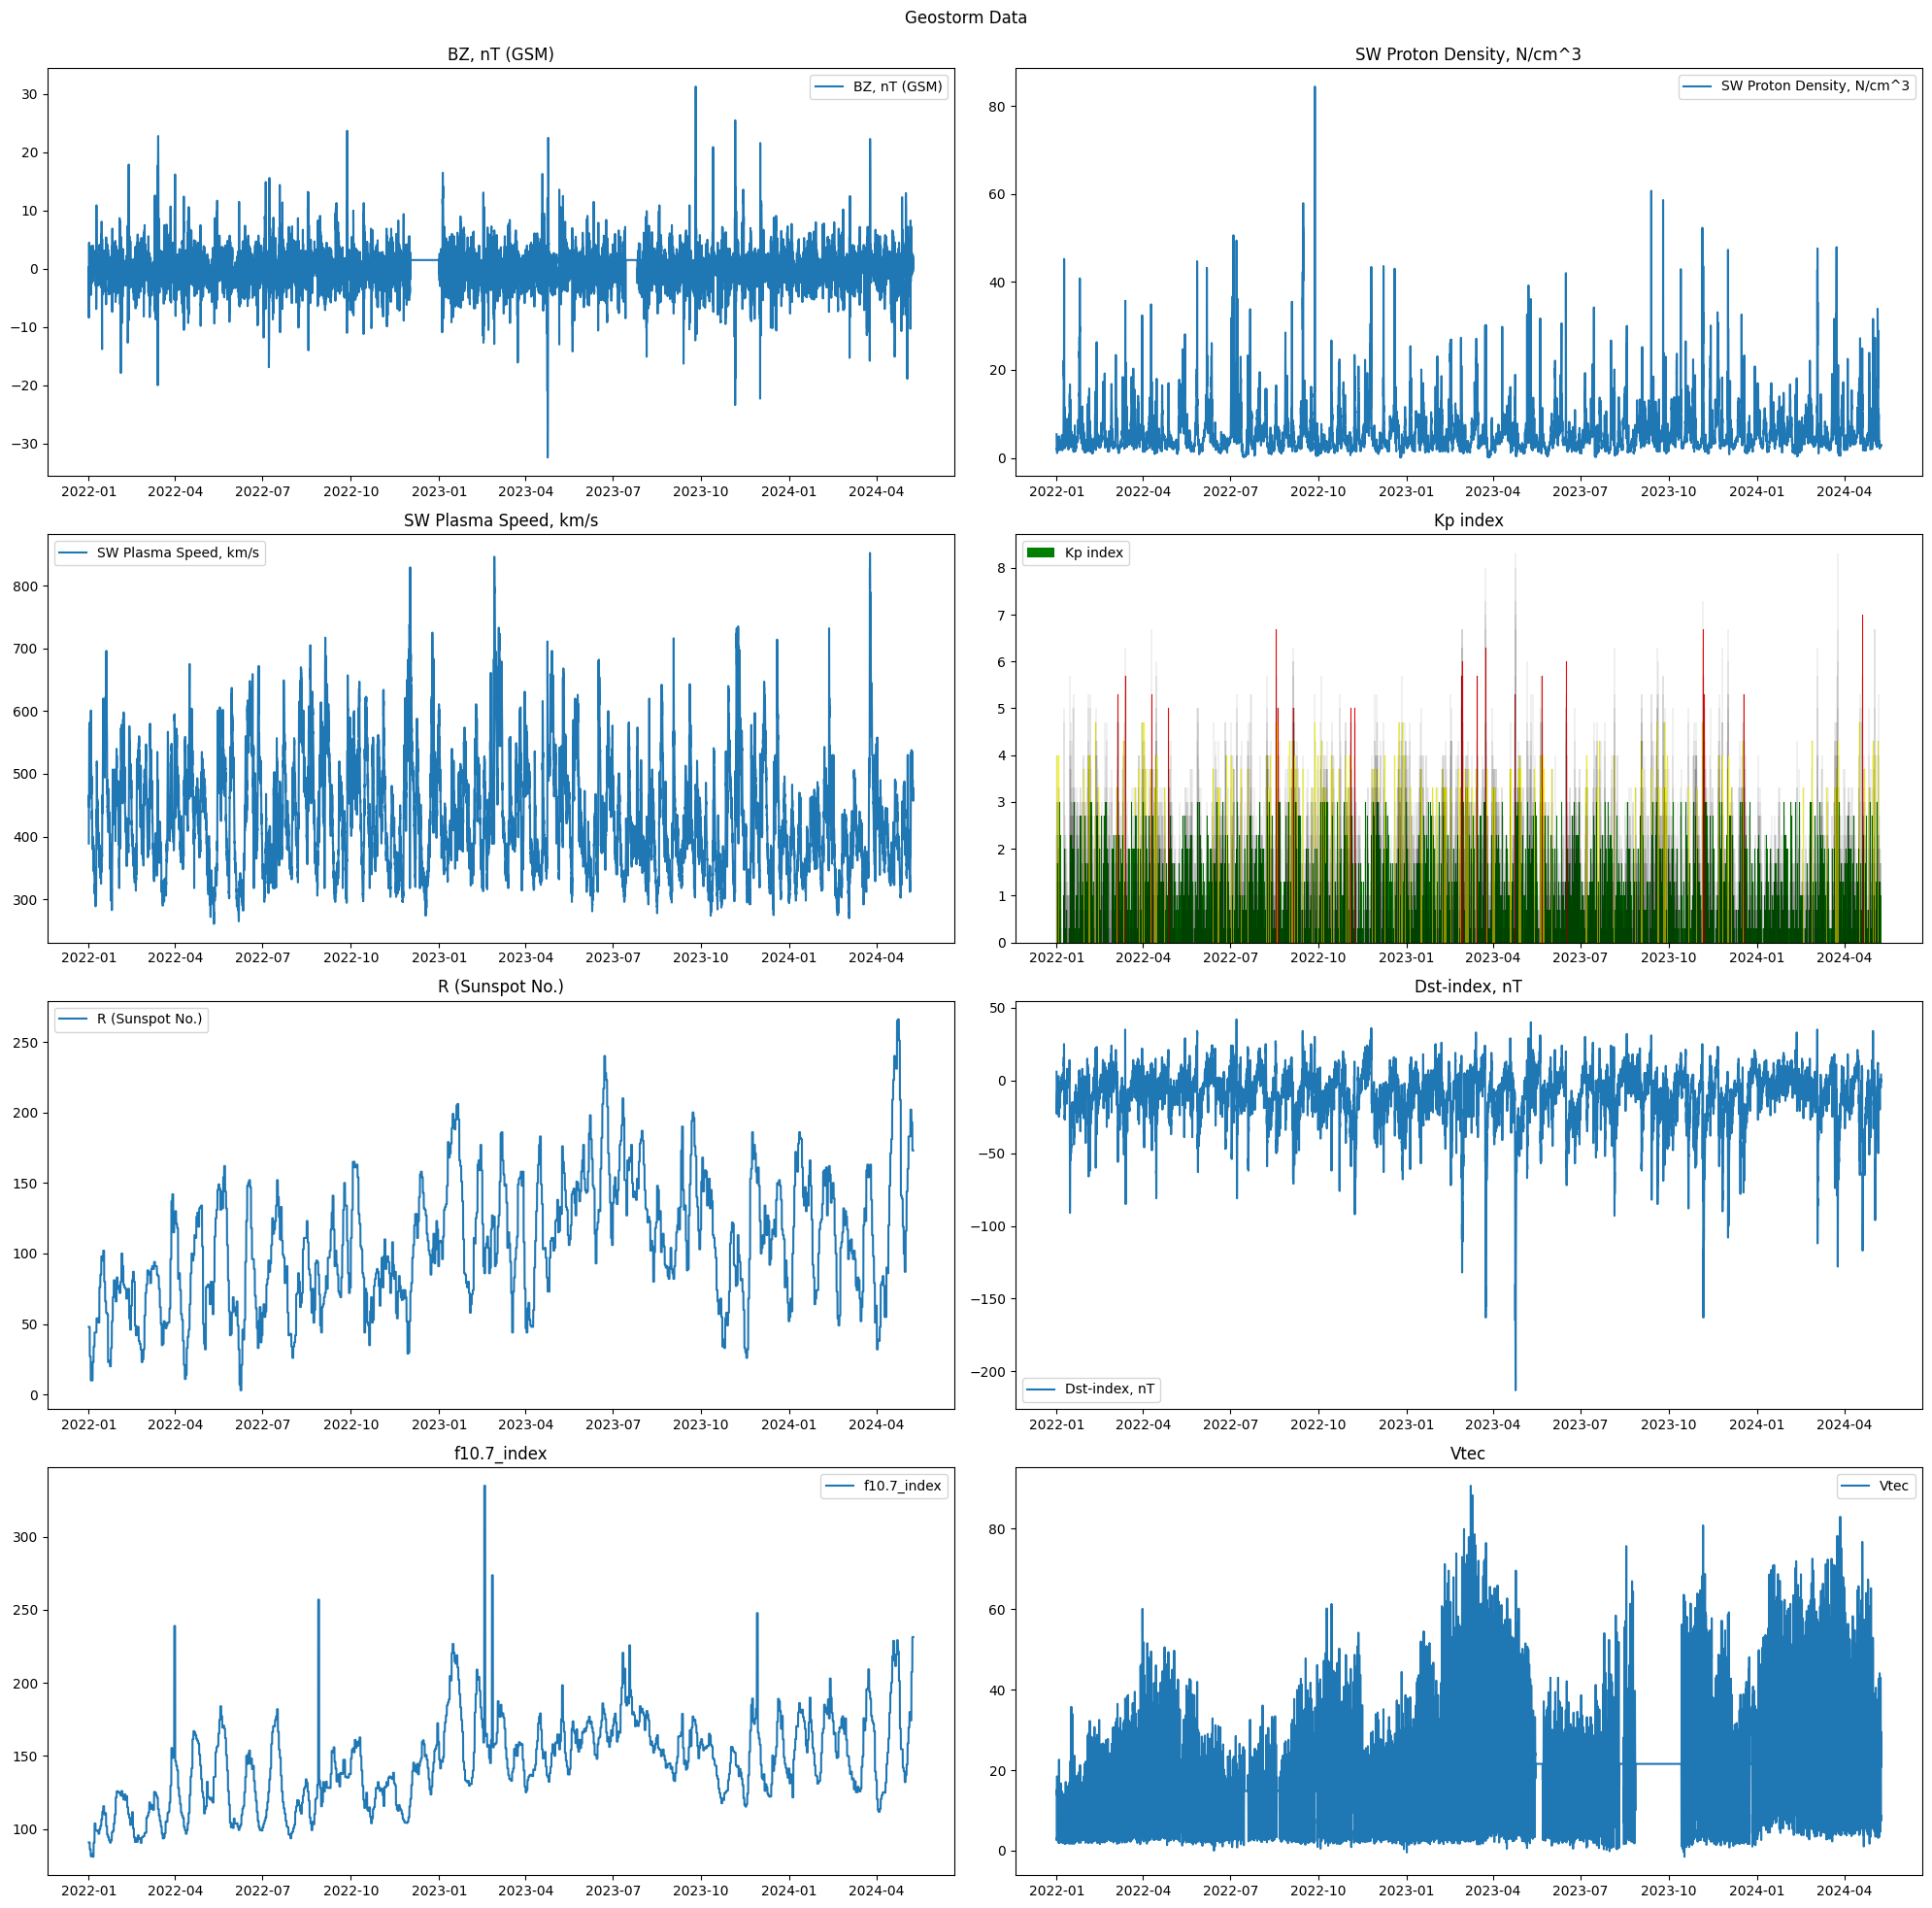

In [5]:

# Load data
df = pd.read_csv('data.csv')

# Convert datetime to pandas datetime format if necessary
df['datetime'] = pd.to_datetime(df['datetime'])

# Function to determine bar color based on Kp index value
def bar_color(value):
    if 0 <= value <= 3:
        return 'green'
    elif 3 < value < 5:
        return 'yellow'
    elif 5 <= value <= 10:
        return 'red'
    else:
        return 'black'

# Create 8 subplots in a 4x2 grid
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('Geostorm Data')

# Plotting each variable in its respective subplot
axs[0, 0].plot(df['datetime'], df['BZ, nT (GSM)'], label='BZ, nT (GSM)')
axs[0, 0].set_title('BZ, nT (GSM)')
axs[0, 0].legend()

axs[0, 1].plot(df['datetime'], df['SW Proton Density, N/cm^3'], label='SW Proton Density, N/cm^3')
axs[0, 1].set_title('SW Proton Density, N/cm^3')
axs[0, 1].legend()

axs[1, 0].plot(df['datetime'], df['SW Plasma Speed, km/s'], label='SW Plasma Speed, km/s')
axs[1, 0].set_title('SW Plasma Speed, km/s')
axs[1, 0].legend()

colors = df['Kp index'].apply(bar_color)
axs[1, 1].bar(df['datetime'], df['Kp index'], color=colors, label='Kp index', edgecolor='black', width=0.05, linewidth=0.03)
axs[1, 1].set_title('Kp index')
axs[1, 1].legend()

axs[2, 0].plot(df['datetime'], df['R (Sunspot No.)'], label='R (Sunspot No.)')
axs[2, 0].set_title('R (Sunspot No.)')
axs[2, 0].legend()

axs[2, 1].plot(df['datetime'], df['Dst-index, nT'], label='Dst-index, nT')
axs[2, 1].set_title('Dst-index, nT')
axs[2, 1].legend()

axs[3, 0].plot(df['datetime'], df['f10.7_index'], label='f10.7_index')
axs[3, 0].set_title('f10.7_index')
axs[3, 0].legend()

axs[3, 1].plot(df['datetime'], df['Vtec'], label='Vtec')
axs[3, 1].set_title('Vtec')
axs[3, 1].legend()

# Adjust layout to prevent overlapping and improve readability
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top to fit the main title

plt.show()


# Plot the relation between each value and Vtec

In [6]:
df.head()

,index,datetime,YEAR,DOY,HR,"BZ, nT (GSM)","SW Proton Density, N/cm^3","SW Plasma Speed, km/s",Kp index,R (Sunspot No.),"Dst-index, nT",f10.7_index,Vtec
0,0,2022-01-01 00:00:00,2022,1,0,-4.0,5.4,389.0,2.3,48,6,90.8,3.00
1,1,2022-01-01 01:00:00,2022,1,1,0.4,4.7,390.0,2.3,48,-3,90.8,2.95
2,2,2022-01-01 02:00:00,2022,1,2,-4.1,2.1,454.0,2.3,48,-7,90.8,2.77
3,3,2022-01-01 03:00:00,2022,1,3,-8.4,2.7,466.0,4.0,48,-13,90.8,2.57
4,4,2022-01-01 04:00:00,2022,1,4,-4.4,1.9,454.0,4.0,48,-21,90.8,3.78


In [13]:
df.describe()

,index,datetime,YEAR,DOY,HR,"BZ, nT (GSM)","SW Proton Density, N/cm^3","SW Plasma Speed, km/s",Kp index,R (Sunspot No.),"Dst-index, nT",f10.7_index,Vtec
count,20616.000000,20616,20616.000000,20616.000000,20616.000000,20616.000000,20616.000000,20616.000000,20616.000000,20616.000000,20616.000000,20616.000000,20616.000000
mean,10307.500000,2023-03-06 11:30:00,2022.725262,165.279395,11.500000,0.045630,5.765769,429.566793,1.908018,107.394645,-10.597206,145.281374,19.513678
min,0.000000,2022-01-01 00:00:00,2022.000000,1.000000,0.000000,-32.400000,0.100000,261.000000,0.000000,3.000000,-213.000000,81.000000,-1.520000
25%,5153.750000,2022-08-03 17:45:00,2022.000000,72.000000,5.750000,-1.700000,2.800000,363.000000,1.000000,74.000000,-18.000000,124.500000,7.780000
50%,10307.500000,2023-03-06 11:30:00,2023.000000,151.000000,11.500000,0.100000,4.300000,413.500000,1.700000,105.000000,-7.000000,144.100000,16.880000
75%,15461.250000,2023-10-07 05:15:00,2023.000000,258.000000,17.250000,1.500000,7.000000,485.000000,2.700000,140.000000,1.000000,165.300000,26.330000
max,20615.000000,2024-05-08 23:00:00,2024.000000,365.000000,23.000000,31.300000,84.400000,852.000000,8.300000,266.000000,42.000000,335.000000,90.690000
std,5951.470911,NaN,0.706845,106.867062,6.922354,3.330069,5.049335,88.149215,1.261072,44.868260,18.391608,30.062151,14.423438


In [8]:
features1 = ["BZ, nT (GSM)","SW Proton Density, N/cm^3","SW Plasma Speed, km/s","Kp index","R (Sunspot No.)","Dst-index, nT","f10.7_index","Vtec"]
corr_matrix = df[features1].corr()
corr_matrix["Vtec"].sort_values(ascending=False)

Vtec                         1.000000
f10.7_index                  0.206871
R (Sunspot No.)              0.142936
SW Proton Density, N/cm^3    0.026460
Kp index                     0.005598
SW Plasma Speed, km/s       -0.006910
BZ, nT (GSM)                -0.033183
Dst-index, nT               -0.044084
Name: Vtec, dtype: float64

Variables like f10.7_index and R (Sunspot No.) show the highest positive correlations, but they are still relatively weak.

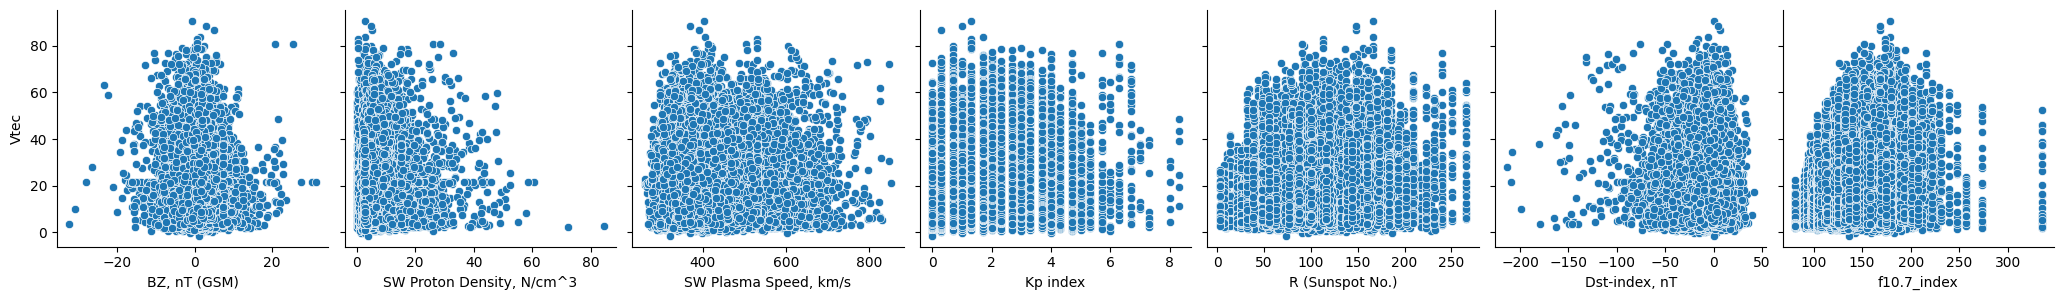

In [12]:
features= ['BZ, nT (GSM)', 'SW Proton Density, N/cm^3', 'SW Plasma Speed, km/s', 
             'Kp index', 'R (Sunspot No.)', 'Dst-index, nT', 'f10.7_index']
df_drawing = df[['BZ, nT (GSM)', 'SW Proton Density, N/cm^3', 'SW Plasma Speed, km/s', 
              'Kp index', 'R (Sunspot No.)', 'Dst-index, nT', 'f10.7_index', 'Vtec']]

sns.pairplot(df_drawing, x_vars=features, y_vars=['Vtec'], height=3)
plt.show()


# Clean the data 

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()
df_without_datetime =df.drop("datetime" ,axis=1)
# Fit and transform the data
df_scaling_using_minmax = pd.DataFrame(min_max_scaler.fit_transform(df_without_datetime), columns=df_without_datetime.columns)

print("Min-Max Scaled DataFrame:")
df_scaling_using_minmax

Min-Max Scaled DataFrame:


,index,YEAR,DOY,HR,"BZ, nT (GSM)","SW Proton Density, N/cm^3","SW Plasma Speed, km/s",Kp index,R (Sunspot No.),"Dst-index, nT",f10.7_index,Vtec
0,0.000000,0.0,0.000000,0.000000,0.445840,0.062871,0.216582,0.277108,0.171103,0.858824,0.038583,0.049019
1,0.000049,0.0,0.000000,0.043478,0.514914,0.054567,0.218274,0.277108,0.171103,0.823529,0.038583,0.048476
2,0.000097,0.0,0.000000,0.086957,0.444270,0.023725,0.326565,0.277108,0.171103,0.807843,0.038583,0.046524
3,0.000146,0.0,0.000000,0.130435,0.376766,0.030842,0.346870,0.481928,0.171103,0.784314,0.038583,0.044355
4,0.000194,0.0,0.000000,0.173913,0.439560,0.021352,0.326565,0.481928,0.171103,0.752941,0.038583,0.057477
...,...,...,...,...,...,...,...,...,...,...,...,...
20611,0.999806,1.0,0.351648,0.826087,0.525903,0.032028,0.351946,0.084337,0.646388,0.839216,0.592126,0.337057
20612,0.999854,1.0,0.351648,0.869565,0.535322,0.033215,0.336717,0.084337,0.646388,0.831373,0.592126,0.206702
20613,0.999903,1.0,0.351648,0.913043,0.532182,0.032028,0.333333,0.120482,0.646388,0.843137,0.592126,0.096410
20614,0.999951,1.0,0.351648,0.956522,0.519623,0.032028,0.331641,0.120482,0.646388,0.847059,0.592126,0.130029


In [19]:
# optioin 2 
# Initialize the scalers
standard_scaler = StandardScaler()
# Fit and transform the specific columns
df_scaling_standard = standard_scaler.fit_transform(df_without_datetime)

# Create a DataFrame for the scaled columns
df_scaling_using_standardscale = pd.DataFrame(df_scaling_standard)

df_scaling_using_standardscale

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.731967,-1.026079,-1.537269,-1.661325,-1.214908,-0.072441,-0.460217,0.310840,-1.323788,0.902456,-1.812335,-1.144947
1,-1.731799,-1.026079,-1.537269,-1.516862,0.106418,-0.211076,-0.448872,0.310840,-1.323788,0.413090,-1.812335,-1.148414
2,-1.731631,-1.026079,-1.537269,-1.372399,-1.244938,-0.726008,0.277187,0.310840,-1.323788,0.195594,-1.812335,-1.160894
3,-1.731463,-1.026079,-1.537269,-1.227936,-2.536234,-0.607178,0.413323,1.658932,-1.323788,-0.130649,-1.812335,-1.174761
4,-1.731295,-1.026079,-1.537269,-1.083473,-1.335029,-0.765618,0.277187,1.658932,-1.323788,-0.565641,-1.812335,-1.090867
...,...,...,...,...,...,...,...,...,...,...,...,...
20611,1.731295,1.803462,-0.339490,1.083473,0.316629,-0.587373,0.447357,-0.957953,1.462213,0.630586,2.864756,0.696544
20612,1.731463,1.803462,-0.339490,1.227936,0.496810,-0.567568,0.345255,-0.957953,1.462213,0.521838,2.864756,-0.136842
20613,1.731631,1.803462,-0.339490,1.372399,0.436749,-0.587373,0.322566,-0.720054,1.462213,0.684960,2.864756,-0.841961
20614,1.731799,1.803462,-0.339490,1.516862,0.196508,-0.587373,0.311221,-0.720054,1.462213,0.739334,2.864756,-0.627028
